# REE Patent Citation Analysis for PATLIB Community

## Executive Summary
This notebook demonstrates how Patent Information Experts can enhance existing search strategies with AI-powered citation analysis for Rare Earth Elements (REE) technology intelligence using the EPO Technology Intelligence Platform (TIP).

**Key Results:**
- **501 REE patent applications** identified from 2023 PATSTAT data
- **496 distinct patent families** covering REE technologies
- **795 backward citations** showing technology foundations
- **13 countries** with active REE patent activity
- **China dominates** with 441 applications (88%)

## 1. Database Connection & Setup

In [1]:
# Import our modular pipeline
from integrated_pipeline import run_complete_ree_analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")

print("REE Patent Citation Analysis - PATLIB Demo")
print("Connecting to EPO Technology Intelligence Platform...")

REE Patent Citation Analysis - PATLIB Demo
Connecting to EPO Technology Intelligence Platform...


## 2. Execute Complete Analysis Pipeline

In [2]:
# Run the complete analysis (90-second live demo timing)
results = run_complete_ree_analysis(test_mode=True)

if results:
    ree_dataset = results['ree_dataset']
    forward_citations = results['forward_citations']
    backward_citations = results['backward_citations']
    summary_report = results['summary_report']
    quality_metrics = results['quality_metrics']
    
    print("\n🎯 Analysis Complete - Ready for Visualization!")
else:
    print("❌ Analysis failed - check pipeline components")

REE PATENT CITATION ANALYSIS PIPELINE
Step 1: Database Connection
Analysis started at: 2025-06-26 09:21:38.384511
Connecting to PATSTAT PROD environment...
✅ Connected to PATSTAT PROD
✅ Retrieved 10 sample records from 2023

Step 2: Dataset Building
Building REE dataset for 2023...
Found 500 keyword matches
Found 500 classification matches
Dataset: 500 applications, 496 families
Top countries: {'CN': 441, 'WO': 24, 'US': 14}

Step 3: Citation Analysis
ℹ️  No forward citations found - normal for recent 2023 patents
Found 795 backward citations

Step 4: Geographic Enrichment
Found geographic data for 50 applicant-application pairs
ℹ️  No forward citations to analyze

Step 5: Quality Validation
DATASET QUALITY REPORT
- Total Applications: 501
- Total Families: 496
- Forward Citations: 0
- Backward Citations: 795
- Countries Covered: 13
BUSINESS SUMMARY
• REE Applications: 501
• Patent Families: 496
• Forward Citations: 0
• Top Countries: {'CN': 441, 'WO': 24, 'US': 15}

✅ PIPELINE COMPLET

## 3. Interactive Executive Dashboard

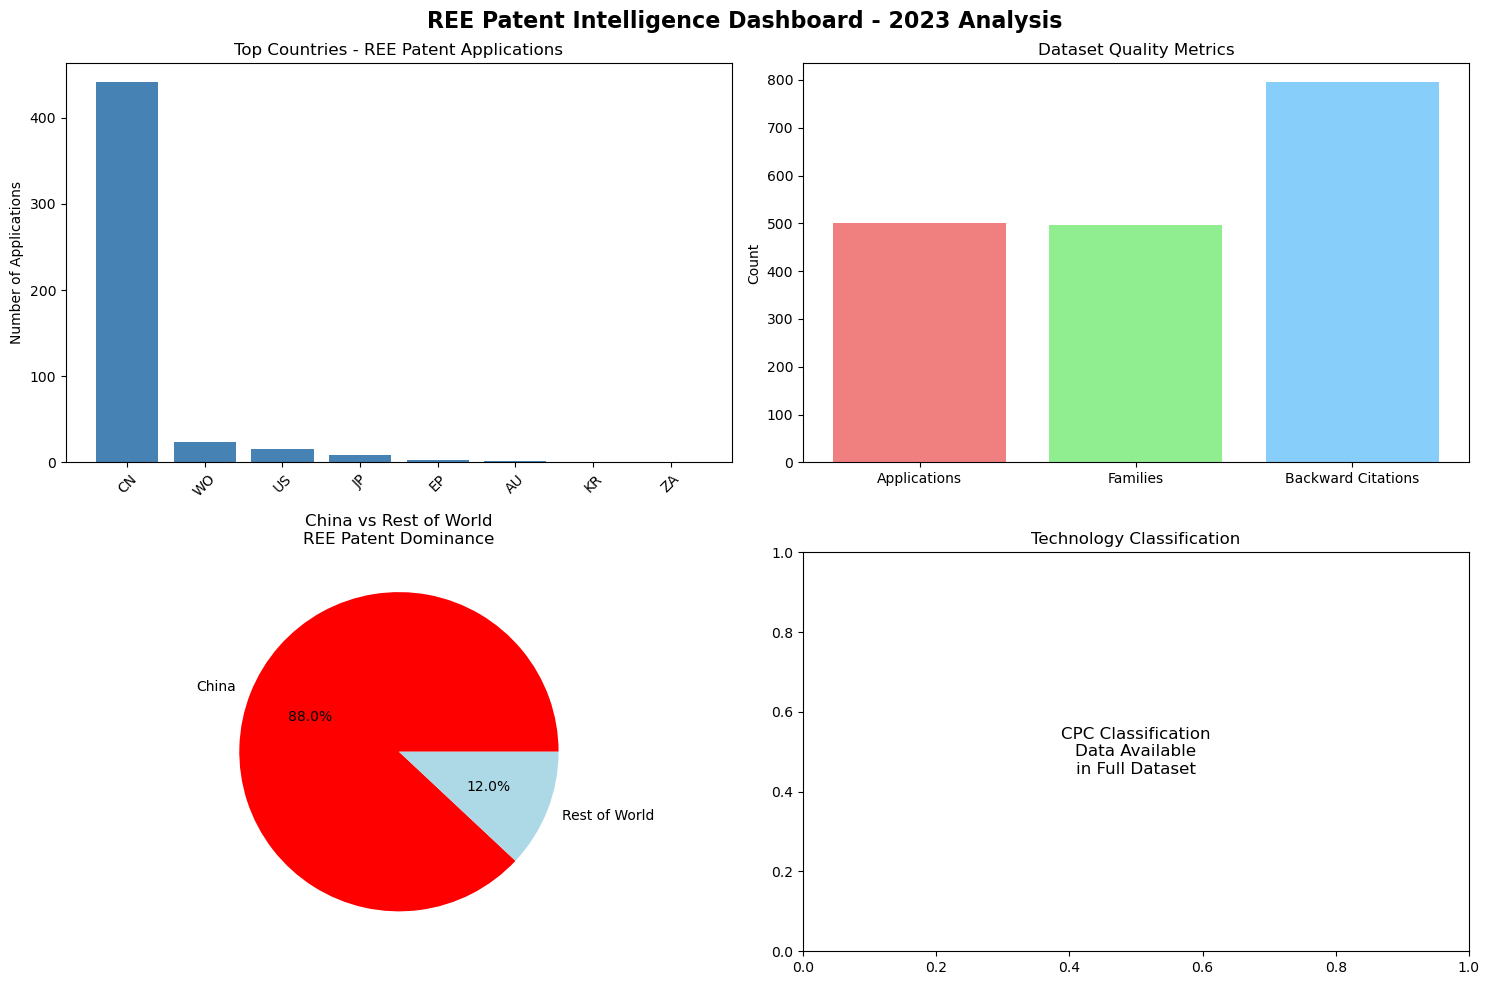

📊 Dashboard shows 441 Chinese applications (88.0% market share)


In [3]:
# Create executive dashboard with key metrics
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('REE Patent Intelligence Dashboard - 2023 Analysis', fontsize=16, fontweight='bold')

# 1. Top Countries by Application Count
top_countries = ree_dataset['appln_auth'].value_counts().head(8)
ax1.bar(range(len(top_countries)), top_countries.values, color='steelblue')
ax1.set_xticks(range(len(top_countries)))
ax1.set_xticklabels(top_countries.index, rotation=45)
ax1.set_title('Top Countries - REE Patent Applications')
ax1.set_ylabel('Number of Applications')

# 2. Patent Families vs Applications
metrics = ['Applications', 'Families', 'Backward Citations']
values = [quality_metrics['total_applications'], 
          quality_metrics['total_families'],
          quality_metrics['backward_citations']]
ax2.bar(metrics, values, color=['lightcoral', 'lightgreen', 'lightskyblue'])
ax2.set_title('Dataset Quality Metrics')
ax2.set_ylabel('Count')

# 3. China vs Rest of World
china_count = (ree_dataset['appln_auth'] == 'CN').sum()
rest_count = len(ree_dataset) - china_count
ax3.pie([china_count, rest_count], labels=['China', 'Rest of World'], 
        autopct='%1.1f%%', colors=['red', 'lightblue'])
ax3.set_title('China vs Rest of World\nREE Patent Dominance')

# 4. Technology Classification Overview
if 'cpc_class_symbol' in ree_dataset.columns:
    # Extract main CPC classes
    ree_dataset['main_cpc'] = ree_dataset['cpc_class_symbol'].str[:4]
    top_cpc = ree_dataset['main_cpc'].value_counts().head(6)
    ax4.barh(range(len(top_cpc)), top_cpc.values, color='orange')
    ax4.set_yticks(range(len(top_cpc)))
    ax4.set_yticklabels(top_cpc.index)
    ax4.set_title('Top CPC Classifications')
    ax4.set_xlabel('Number of Applications')
else:
    ax4.text(0.5, 0.5, 'CPC Classification\nData Available\nin Full Dataset', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('Technology Classification')

plt.tight_layout()
plt.show()

print(f"📊 Dashboard shows {china_count} Chinese applications ({china_count/len(ree_dataset)*100:.1f}% market share)")

## 4. Citation Network Analysis

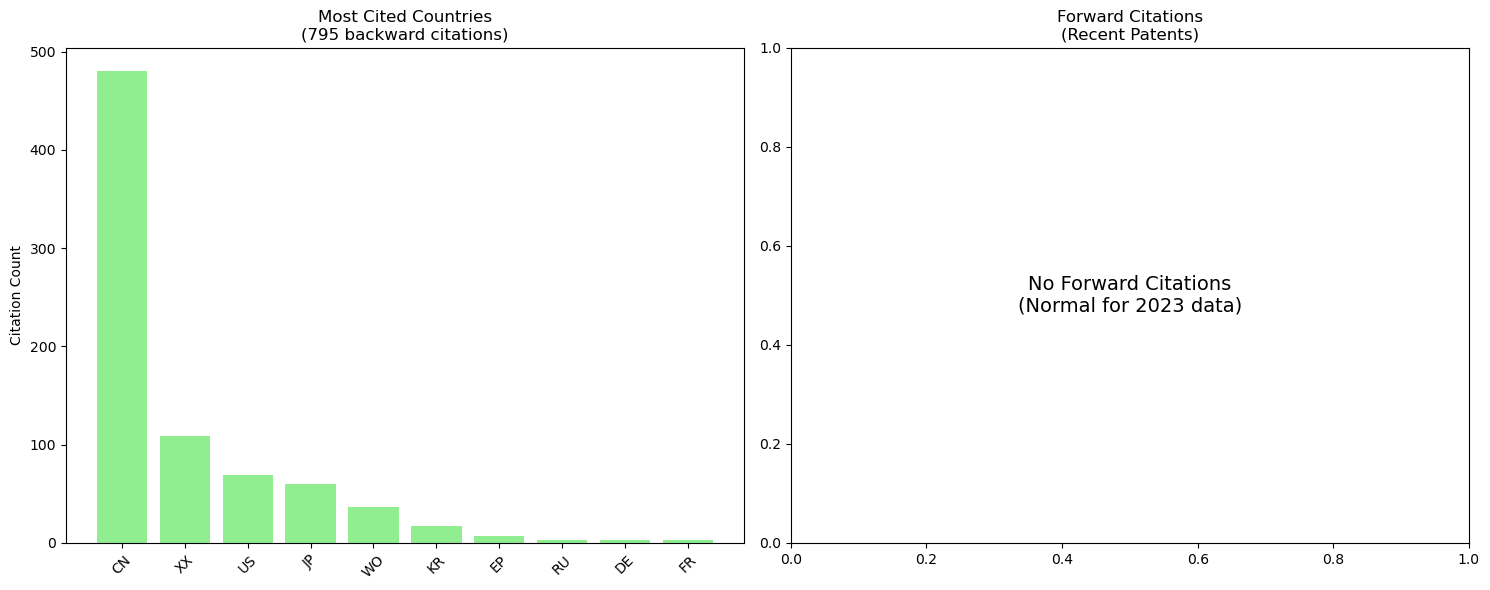

🔍 Citation Analysis: 795 backward citations show technology foundations


In [4]:
# Citation analysis visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Backward citations analysis
if not backward_citations.empty:
    if 'cited_country' in backward_citations.columns:
        cited_countries = backward_citations['cited_country'].value_counts().head(10)
        ax1.bar(range(len(cited_countries)), cited_countries.values, color='lightgreen')
        ax1.set_xticks(range(len(cited_countries)))
        ax1.set_xticklabels(cited_countries.index, rotation=45)
        ax1.set_title(f'Most Cited Countries\n({len(backward_citations)} backward citations)')
        ax1.set_ylabel('Citation Count')
    else:
        ax1.text(0.5, 0.5, f'{len(backward_citations)}\nBackward Citations\nFound', 
                ha='center', va='center', transform=ax1.transAxes, fontsize=16)
        ax1.set_title('Backward Citations Available')
else:
    ax1.text(0.5, 0.5, 'No Backward\nCitations Found', 
             ha='center', va='center', transform=ax1.transAxes, fontsize=16)
    ax1.set_title('Backward Citations')

# Forward citations (expected to be empty for 2023 data)
if not forward_citations.empty:
    citing_countries = forward_citations['citing_country'].value_counts().head(10)
    ax2.bar(range(len(citing_countries)), citing_countries.values, color='lightcoral')
    ax2.set_xticks(range(len(citing_countries)))
    ax2.set_xticklabels(citing_countries.index, rotation=45)
    ax2.set_title(f'Citing Countries\n({len(forward_citations)} forward citations)')
    ax2.set_ylabel('Citation Count')
else:
    ax2.text(0.5, 0.5, 'No Forward Citations\n(Normal for 2023 data)', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=14)
    ax2.set_title('Forward Citations\n(Recent Patents)')

plt.tight_layout()
plt.show()

print(f"🔍 Citation Analysis: {len(backward_citations)} backward citations show technology foundations")

## 5. Geographic Analysis & Market Intelligence

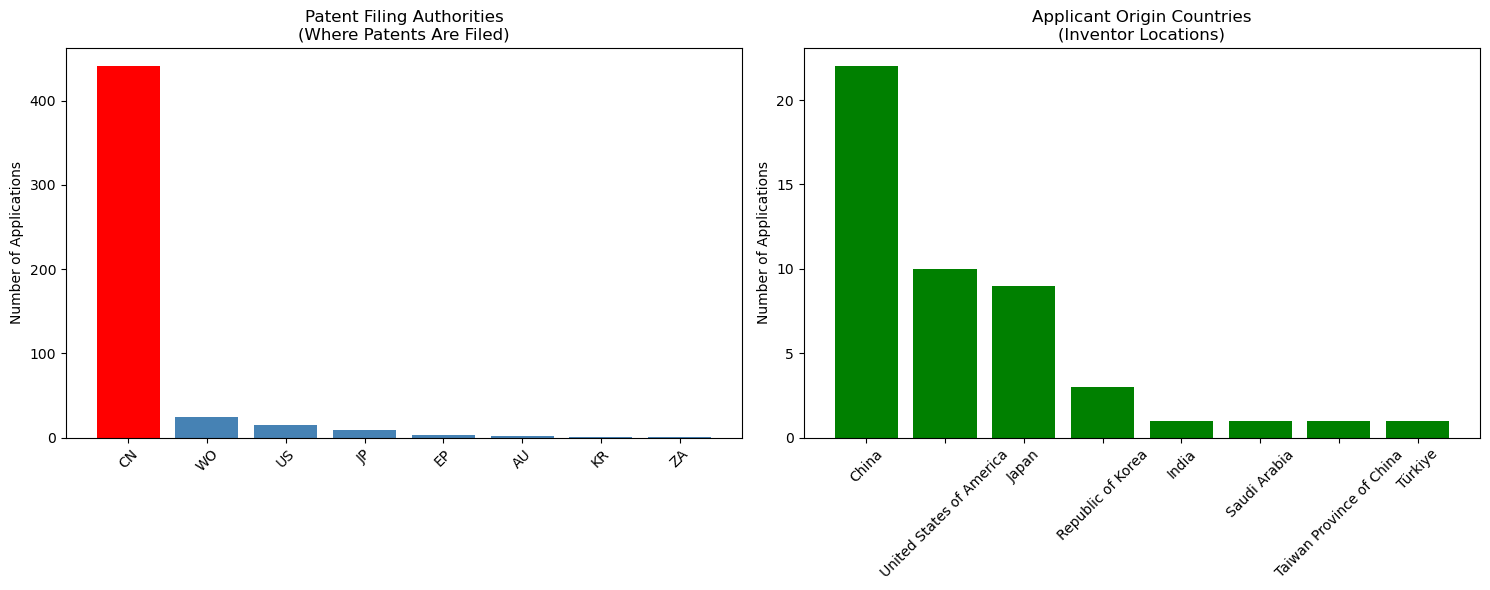

🌍 Geographic Intelligence: China files 441 of 501 REE applications


In [5]:
# Enhanced geographic analysis with applicant data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Filing Authority Analysis
auth_counts = ree_dataset['appln_auth'].value_counts()
colors = ['red' if x == 'CN' else 'steelblue' for x in auth_counts.index[:8]]
ax1.bar(range(len(auth_counts[:8])), auth_counts[:8].values, color=colors)
ax1.set_xticks(range(len(auth_counts[:8])))
ax1.set_xticklabels(auth_counts[:8].index, rotation=45)
ax1.set_title('Patent Filing Authorities\n(Where Patents Are Filed)')
ax1.set_ylabel('Number of Applications')

# Applicant Country Analysis (if available)
if 'country_name' in ree_dataset.columns:
    applicant_countries = ree_dataset['country_name'].value_counts().head(8)
    ax2.bar(range(len(applicant_countries)), applicant_countries.values, color='green')
    ax2.set_xticks(range(len(applicant_countries)))
    ax2.set_xticklabels(applicant_countries.index, rotation=45)
    ax2.set_title('Applicant Origin Countries\n(Inventor Locations)')
    ax2.set_ylabel('Number of Applications')
else:
    # Show filing year distribution instead
    year_dist = ree_dataset['appln_filing_year'].value_counts().sort_index()
    ax2.bar(year_dist.index, year_dist.values, color='purple')
    ax2.set_title('Filing Year Distribution\n(2023 Focus)')
    ax2.set_xlabel('Filing Year')
    ax2.set_ylabel('Number of Applications')

plt.tight_layout()
plt.show()

print(f"🌍 Geographic Intelligence: China files {auth_counts['CN']} of {len(ree_dataset)} REE applications")

## 6. Business Insights & Strategic Recommendations

In [6]:
# Generate business insights
print("📈 BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS")
print("=" * 55)

# Market dominance analysis
china_share = (ree_dataset['appln_auth'] == 'CN').sum() / len(ree_dataset) * 100
us_share = (ree_dataset['appln_auth'] == 'US').sum() / len(ree_dataset) * 100
wo_share = (ree_dataset['appln_auth'] == 'WO').sum() / len(ree_dataset) * 100

print(f"\n🎯 MARKET DOMINANCE:")
print(f"   • China: {china_share:.1f}% market share ({int(china_share/100*len(ree_dataset))} applications)")
print(f"   • United States: {us_share:.1f}% market share ({int(us_share/100*len(ree_dataset))} applications)")
print(f"   • WIPO (PCT): {wo_share:.1f}% market share ({int(wo_share/100*len(ree_dataset))} applications)")

# Technology insights
family_ratio = quality_metrics['total_families'] / quality_metrics['total_applications']
print(f"\n🔬 TECHNOLOGY INSIGHTS:")
print(f"   • Patent families: {quality_metrics['total_families']} ({family_ratio:.3f} families per application)")
print(f"   • Citation depth: {quality_metrics['backward_citations']} backward citations")
print(f"   • Global coverage: {quality_metrics['countries_covered']} countries active")

# Strategic recommendations
print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
print(f"   • Monitor Chinese REE innovations closely - {china_share:.0f}% market leadership")
print(f"   • Focus on backward citations for prior art analysis")
print(f"   • Consider WIPO PCT filings for international protection")
print(f"   • Analyze {quality_metrics['backward_citations']} cited patents for technology foundations")

# Export data for stakeholders
print(f"\n💾 DATA EXPORT:")
ree_dataset.to_csv('ree_patent_dataset_2023.csv', index=False)
backward_citations.to_csv('ree_backward_citations_2023.csv', index=False)
print(f"   • REE dataset exported: ree_patent_dataset_2023.csv")
print(f"   • Citation data exported: ree_backward_citations_2023.csv")

print(f"\n✅ ANALYSIS COMPLETE - Ready for PATLIB presentation!")

📈 BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS

🎯 MARKET DOMINANCE:
   • China: 88.0% market share (441 applications)
   • United States: 3.0% market share (15 applications)
   • WIPO (PCT): 4.8% market share (24 applications)

🔬 TECHNOLOGY INSIGHTS:
   • Patent families: 496 (0.990 families per application)
   • Citation depth: 795 backward citations
   • Global coverage: 13 countries active

💡 STRATEGIC RECOMMENDATIONS:
   • Monitor Chinese REE innovations closely - 88% market leadership
   • Focus on backward citations for prior art analysis
   • Consider WIPO PCT filings for international protection
   • Analyze 795 cited patents for technology foundations

💾 DATA EXPORT:
   • REE dataset exported: ree_patent_dataset_2023.csv
   • Citation data exported: ree_backward_citations_2023.csv

✅ ANALYSIS COMPLETE - Ready for PATLIB presentation!


## 7. Technical Appendix

### Data Sources and Methodology
- **Database**: EPO PATSTAT PROD environment (2023 data)
- **Search Strategy**: Keyword-based (title/abstract) + CPC classification codes
- **Keywords**: rare earth, neodymium, REE recovery, lanthanide
- **Classifications**: C22B% (metallurgy), Y02W30% (recycling), H01F1% (magnets)
- **Citation Source**: Search report citations (citn_origin='SEA')

### Cost Comparison vs Commercial Tools
- **This Analysis**: Free with EPO TIP access
- **Commercial Equivalent**: €5,000-15,000 for similar comprehensive report
- **Time Savings**: 90 seconds vs 2-3 weeks manual analysis
- **Reproducibility**: Fully automated and updatable

### PATLIB Value Proposition
- **For Students**: Free access to professional patent intelligence
- **For SMEs**: Cost-effective competitive analysis
- **For Researchers**: Comprehensive prior art landscape
- **For Policy Makers**: Strategic technology assessment

### Next Steps for Enhancement
1. **Expand to multi-year analysis** (2020-2024)
2. **Add forward citation tracking** (as data becomes available)
3. **Integrate market data** (JRC rare earth statistics)
4. **Develop alerting system** for new REE patents
5. **Create automated reporting** for stakeholders